In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [2]:
df=pd.read_csv("/Users/ashutoshsingh/Downloads/medical_costs.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Tobacco   1338 non-null   object 
 5   Area      1338 non-null   object 
 6   Cost      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['Area'].unique()

array(['SW', 'SE', 'NW', 'NE'], dtype=object)

In [5]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [6]:
df['Tobacco'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df.isnull().sum() 

Age         0
Gender      0
BMI         0
Children    0
Tobacco     0
Area        0
Cost        0
dtype: int64

In [9]:
df['Area'].value_counts()

SE    364
SW    325
NW    325
NE    324
Name: Area, dtype: int64

In [38]:
df['Tobacco']=df['Tobacco'].replace('yes',1)
df['Tobacco']=df['Tobacco'].replace('no',0)

df['Gender']=df['Gender'].replace('M',1)
df['Gender']=df['Gender'].replace('F',0)

df['Area']=df['Area'].replace('SW',1)
df['Area']=df['Area'].replace('SE',0)
df['Area']=df['Area'].replace('NW',2)
df['Area']=df['Area'].replace('NE',3)

In [39]:
df.head()

,Age,Gender,BMI,Children,Tobacco,Area,Cost
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [40]:
df['Area'].unique()

array([1, 0, 2, 3])

In [41]:
df['Area'].value_counts()

0    347
2    323
3    322
1    320
Name: Area, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
df.describe()

,Age,Gender,BMI,Children,Tobacco,Area,Cost
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,39.192835,0.503049,30.387915,1.090701,0.200457,1.472561,13006.677072
std,14.084095,0.500181,5.773129,1.205823,0.400495,1.126957,11630.898072
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.180000,0.000000,0.000000,0.000000,4719.683425
50%,39.000000,1.000000,30.205000,1.000000,0.000000,1.000000,9296.016525
75%,51.000000,1.000000,34.390000,2.000000,0.000000,2.000000,16428.094587
max,64.000000,1.000000,44.880000,5.000000,1.000000,3.000000,49577.662400


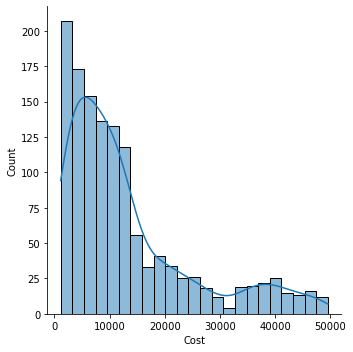

In [60]:
# Distribution of the response
sns.displot(x='Cost', data = df, kde = True)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

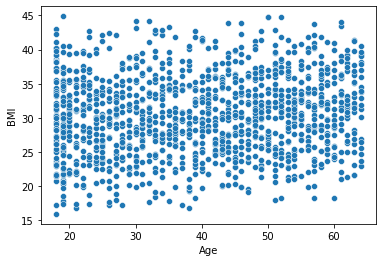

In [44]:
import seaborn as sns
sns.scatterplot(x=df['Age'],y=df['BMI'],data=df)

In [45]:
index_to_remove=df[(df['BMI']>=45) & (df['Age']<=60)].index

In [46]:
df.drop(index_to_remove,axis=0,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

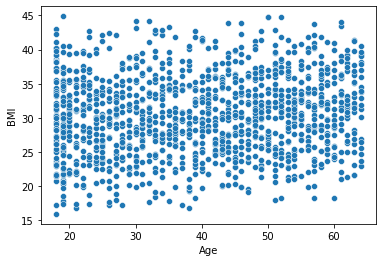

In [47]:
import seaborn as sns
sns.scatterplot(x=df['Age'],y=df['BMI'],data=df)

In [48]:
df.describe()

,Age,Gender,BMI,Children,Tobacco,Area,Cost
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,39.192835,0.503049,30.387915,1.090701,0.200457,1.472561,13006.677072
std,14.084095,0.500181,5.773129,1.205823,0.400495,1.126957,11630.898072
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.180000,0.000000,0.000000,0.000000,4719.683425
50%,39.000000,1.000000,30.205000,1.000000,0.000000,1.000000,9296.016525
75%,51.000000,1.000000,34.390000,2.000000,0.000000,2.000000,16428.094587
max,64.000000,1.000000,44.880000,5.000000,1.000000,3.000000,49577.662400


In [49]:
df.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Cost'>

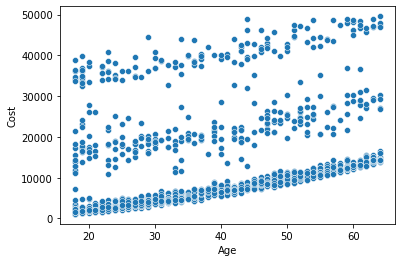

In [50]:
sns.scatterplot(x=df['Age'],y=df['Cost'],data=df)

<AxesSubplot:xlabel='Age', ylabel='Cost'>

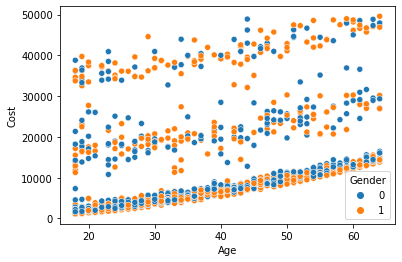

In [62]:
sns.scatterplot(x = 'Age', y = 'Cost', data = df, hue = 'Gender')

In [51]:
index_to_remove=df[(df['Cost']>=50000) & (df['Age']<=60)].index

In [52]:
df.drop(index_to_remove,inplace=True)

In [53]:
df.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Cost'>

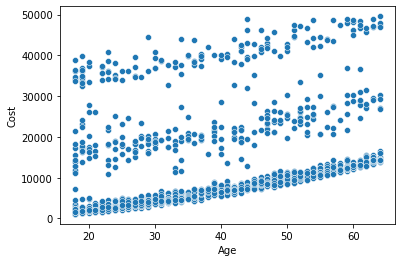

In [54]:
sns.scatterplot(x=df['Age'],y=df['Cost'],data=df)

<AxesSubplot:xlabel='Cost'>

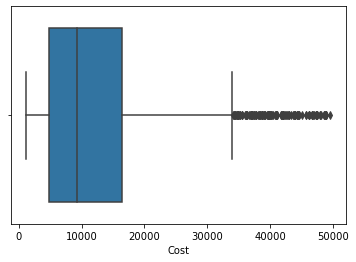

In [65]:
# outliers in the label
sns.boxplot(x='Cost', data=df)

<AxesSubplot:xlabel='Age', ylabel='Cost'>

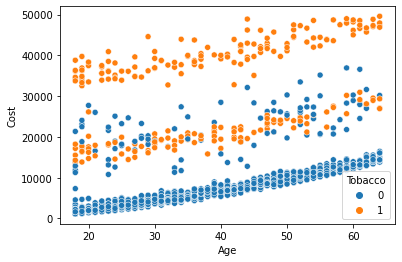

In [75]:
sns.scatterplot(x = 'Age', y = 'Cost', data = df, hue = 'Tobacco')

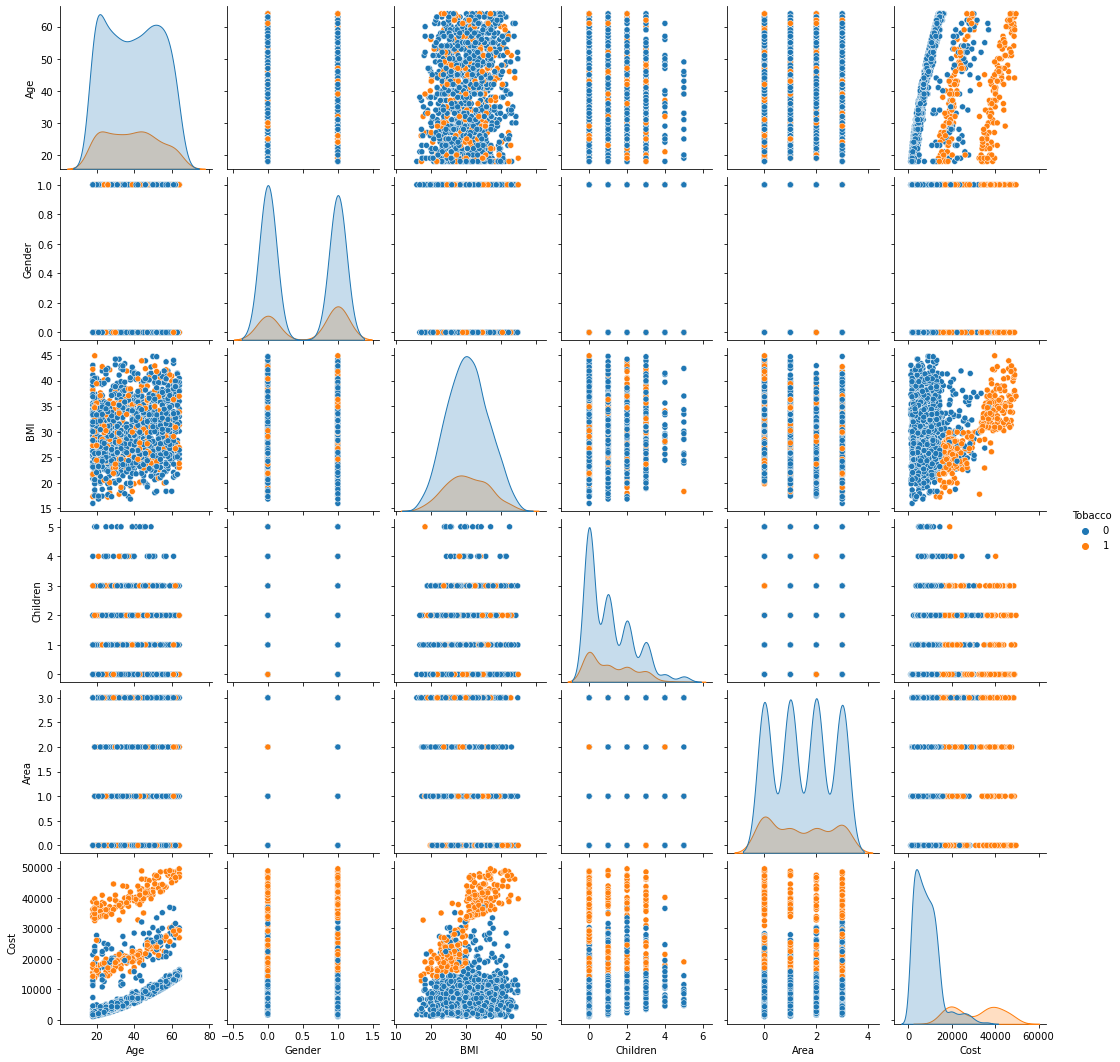

In [77]:
sns.pairplot(df, hue = 'Tobacco')

In [78]:
from scipy import stats
def outlier_remover(x, strategy = 'ignore', factor = None):
    if strategy == 'ignore':
        return
    elif strategy == 'iqr':
        outliers = iqr_outlier(y, factor = factor)
    elif strategy == 'std':
        outliers = std_outlier(y, factor = factor)
    elif strategy =='z_score':
        outliers = zscore_outlier(y, factor = factor)
    return X[outliers == 0], y[outliers == 0]

def iqr_outlier(x, factor = 1.5):
    if factor is None:
        factor = 1.5
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result = pd.Series([0] * len(x), index = x.index)
    result[((x < min_) | (x > max_))] = 1
    return result

def std_outlier(x, factor = 2):
    if factor is None:
        factor = 2
    std = x.std()
    mean = x.mean()
    min_ = mean - factor * std
    max_ = mean + factor * std
    result = pd.Series([0] * len(x), index = x.index)
    result[((x < min_ ) | (x > max_))] = 1
    return result

def zscore_outlier(x, factor = 3):
    if factor is None:
        factor = 3
    x = stats.zscore(x)
    result = pd.Series([0] * len(x), index=x.index)
    result[((x < -factor ) | (x > factor))] = 1
    return result

In [79]:
outliers_iqr = iqr_outlier(df['Cost'])
outliers_std = std_outlier(df['Cost'])
outliers_z = zscore_outlier(df['Cost'])

In [80]:
print('iqr outliers: ', outliers_iqr.sum())
print('std outliers: ', outliers_std.sum())
print('z-score outliers: ', outliers_z.sum())

iqr outliers:  133
std outliers:  109
z-score outliers:  11


<AxesSubplot:>

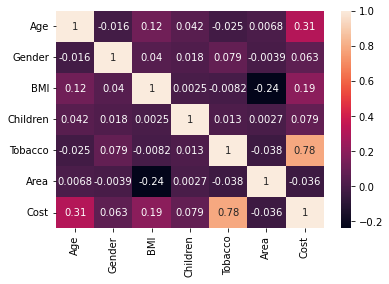

In [81]:
sns.heatmap(df.corr(), annot=True)

In [85]:
predictors = df.drop('Cost', axis = 1)
label = df['Cost'].copy()

In [90]:
def bmi_categorizer(x):
    if x < 18.5:
        return 1 #'underweight'
    elif x < 24.9:
        return 2 # normal
    elif x < 29.9:
        return 3 # overweight
    elif x < 34.9:
        return 4 # obesity I
    elif x < 39.9:
        return 5 # obesity II
    else:
        return 6 # extremely obesity
def add_features(x, add_bmi_category = True):
    x = x.copy()
    if add_bmi_category:
        x['bmi_category'] = x['BMI'].apply(bmi_categorizer)
        return x

In [91]:
predictors = add_features(predictors)

In [92]:
predictors

,Age,Gender,BMI,Children,Tobacco,Area,bmi_category
0,19,0,27.900,0,1,1,3
1,18,1,33.770,1,0,0,4
2,28,1,33.000,3,0,0,4
3,33,1,22.705,0,0,2,2
4,32,1,28.880,0,0,2,3
...,...,...,...,...,...,...,...
1307,50,1,30.970,3,0,2,4
1308,18,0,31.920,0,0,3,4
1309,18,0,36.850,0,0,0,5
1310,21,0,25.800,0,0,1,3


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(predictors[num_feat])
predictors[num_feat] = scaler.transform(predictors[num_feat])

In [94]:
predictors

,Age,Gender,BMI,Children,Tobacco,Area,bmi_category
0,-1.434280,-1.006116,-0.431112,-0.904873,1.997146,-0.419485,3
1,-1.505309,0.993921,0.586056,-0.075248,-0.500714,-1.307168,4
2,-0.795018,0.993921,0.452628,1.584002,-0.500714,-1.307168,4
3,-0.439872,0.993921,-1.331314,-0.904873,-0.500714,0.468199,2
4,-0.510901,0.993921,-0.261295,-0.904873,-0.500714,0.468199,3
...,...,...,...,...,...,...,...
1307,0.767624,0.993921,0.100865,1.584002,-0.500714,0.468199,4
1308,-1.505309,-1.006116,0.265483,-0.904873,-0.500714,1.355883,4
1309,-1.505309,-1.006116,1.119765,-0.904873,-0.500714,-1.307168,5
1310,-1.292222,-1.006116,-0.795005,-0.904873,-0.500714,-0.419485,3


In [95]:
X=df.drop('Cost',axis=1)
Y=df['Cost']

model=LinearRegression()
train_preds=[]
test_preds=[]
for i in range(1,7):
    poly=PolynomialFeatures(degree=i,include_bias=False)
    converted_x=poly.fit_transform(X)
    x_train,x_test,y_train,y_test=train_test_split(converted_x,Y,test_size=0.3,random_state=10)
    model.fit(x_train,y_train)
    train_preds.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    test_preds.append(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))

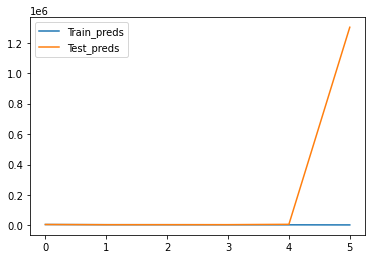

In [96]:
plt.plot(train_preds,label='Train_preds')
plt.plot(test_preds,label='Test_preds')
plt.legend()

In [97]:
model=LinearRegression()
poly=PolynomialFeatures(degree=3)
new_X=poly.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(new_X,Y,test_size=0.3,random_state=10)
model.fit(x_train,y_train)

LinearRegression()

In [58]:
model.score(x_test,y_test)

0.8495911670076159